# DECISION TREE CLASSIFIER USING GINI INDEX AS IMPURITY MEASURE

1. Load the German Credit card dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving German Credit Data.csv to German Credit Data.csv




```
# This is formatted as code
```

2. Create a Pandas Frame for this file and explore its content

In [ ]:
import pandas as pd 
df = pd.read_csv("/content/German Credit Data.csv")

In [ ]:
print(df.shape)
df.info

(1000, 14)


<bound method DataFrame.info of     checkin_acc  duration credit_history  ...  num_credits   job status
0           A11         6            A34  ...            2  A173      0
1           A12        48            A32  ...            1  A173      1
2           A14        12            A34  ...            1  A172      0
3           A11        42            A32  ...            1  A173      0
4           A11        24            A33  ...            2  A173      1
..          ...       ...            ...  ...          ...   ...    ...
995         A14        12            A32  ...            1  A172      0
996         A11        30            A32  ...            1  A174      0
997         A14        12            A32  ...            1  A173      0
998         A11        45            A32  ...            1  A173      1
999         A12        45            A34  ...            1  A173      0

[1000 rows x 14 columns]>

In [ ]:
print(df.head())
print(df.columns)

  checkin_acc  duration credit_history  ...  num_credits   job status
0         A11         6            A34  ...            2  A173      0
1         A12        48            A32  ...            1  A173      1
2         A14        12            A34  ...            1  A172      0
3         A11        42            A32  ...            1  A173      0
4         A11        24            A33  ...            2  A173      1

[5 rows x 14 columns]
Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')


In [ ]:
col = df.columns.tolist()
print(col)

['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc', 'present_emp_since', 'inst_rate', 'personal_status', 'residing_since', 'age', 'inst_plans', 'num_credits', 'job', 'status']


3. Print the first five records and first 7 columns

In [ ]:
df.iloc[0:5,0:7]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3


4. Print the first five records and remaining columns

In [ ]:
df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


5. Few of the columns are categorical and are infered as objects. Ex: checkin_acc. Print all unique values of this column

In [ ]:
df["checkin_acc"].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

6. Encode all categorical features using one-hot encoding. A feature with n values is encoded using (n-1) values, retaining the first one (drop_first = True)

In [ ]:
X_feats = list(df.columns)
X_feats.remove("status")
print(X_feats)

['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc', 'present_emp_since', 'inst_rate', 'personal_status', 'residing_since', 'age', 'inst_plans', 'num_credits', 'job']


In [ ]:
encoded = pd.get_dummies(df[X_feats],drop_first = True)
print(encoded)
print(encoded.columns)

     duration  amount  inst_rate  ...  job_A172  job_A173  job_A174
0           6    1169          4  ...         0         1         0
1          48    5951          2  ...         0         1         0
2          12    2096          2  ...         1         0         0
3          42    7882          2  ...         0         1         0
4          24    4870          3  ...         0         1         0
..        ...     ...        ...  ...       ...       ...       ...
995        12    1736          3  ...         1         0         0
996        30    3857          4  ...         0         0         1
997        12     804          4  ...         0         1         0
998        45    1845          4  ...         0         1         0
999        45    4576          3  ...         0         1         0

[1000 rows x 29 columns]
Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14',
       'cred

In [ ]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   checkin_acc_A12        1000 non-null   uint8
 7   checkin_acc_A13        1000 non-null   uint8
 8   checkin_acc_A14        1000 non-null   uint8
 9   credit_history_A31     1000 non-null   uint8
 10  credit_history_A32     1000 non-null   uint8
 11  credit_history_A33     1000 non-null   uint8
 12  credit_history_A34     1000 non-null   uint8
 13  savings_acc_A62        1000 non-null   uint8
 14  savings_acc_A63        1000 non-null   uint8
 15  savings_acc_A64        1000 non-null   

7. Make independent features of the encoded frame as X and column 'status' as dependent feature.

In [ ]:
X = encoded
Y = df["status"]

8. Divide data into 70% training and 30% as testing.  

In [ ]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_Y , test_Y = train_test_split(X,Y,test_size = 0.3 ,random_state = 11)

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(700, 29)
(700,)
(300, 29)
(300,)


9. Train a decision tree model using Gini INdex and depth of 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =3)
print(clf)
clf.fit(train_X ,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth =5)
print(clf1)
clf1.fit(train_X ,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

10. Make predictions on test/validation data

In [ ]:
predict_Y = clf.predict(test_X )

In [ ]:
predicted_Y = clf1.predict(test_X )

11. Print the confusion matrix, accuracy and AUC score of this model on test set

In [ ]:
from sklearn import metrics
print("Confusion Matrix is ",metrics.confusion_matrix(test_Y ,predict_Y))
print("Accuracy Score is ",metrics.accuracy_score(test_Y, predict_Y))
print("Accuracy Score is ",metrics.roc_auc_score(test_Y, predict_Y))


Confusion Matrix is  [[193   9]
 [ 88  10]]
Accuracy Score is  0.6766666666666666
Accuracy Score is  0.528743180440493


In [ ]:
from sklearn import metrics
print("Confusion Matrix is ",metrics.confusion_matrix(test_Y ,predicted_Y))
print("Accuracy Score is ",metrics.accuracy_score(test_Y, predicted_Y))
print("Accuracy Score is ",metrics.roc_auc_score(test_Y, predicted_Y))


Confusion Matrix is  [[187  15]
 [ 76  22]]
Accuracy Score is  0.6966666666666667
Accuracy Score is  0.5751161850878966


12. Visualize the tree using grapghviz and pydotplus libraries

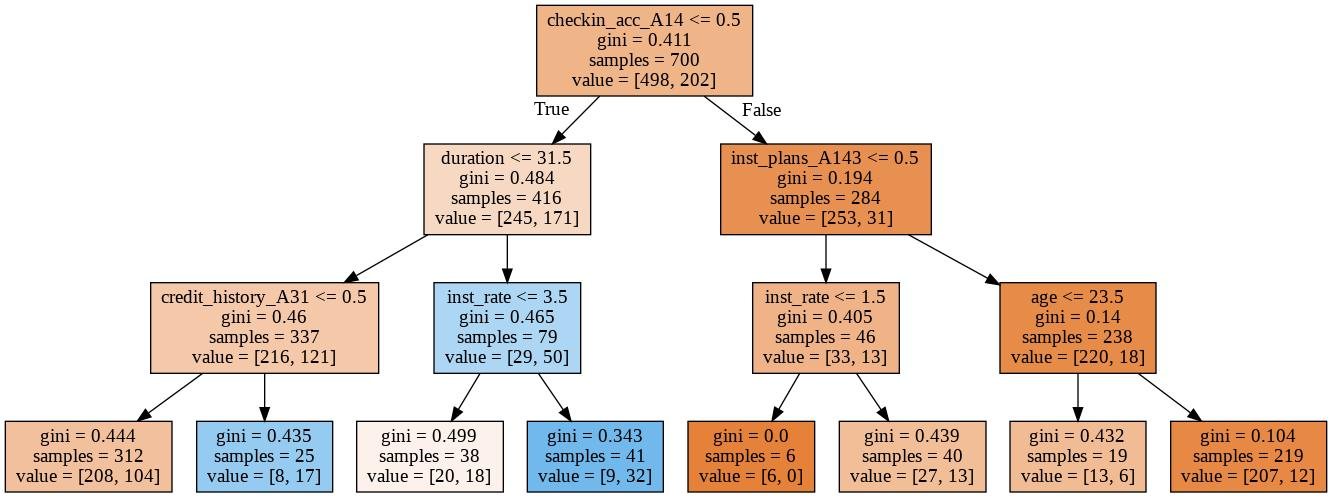

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus as plot
from IPython.display import Image
export_graphviz(clf ,out_file = "tree.odt" , feature_names = train_X.columns, filled = True)
graph = plot.graphviz.graph_from_dot_file("tree.odt")

graph.write_jpg("tree.png")
Image(filename = "tree.png")

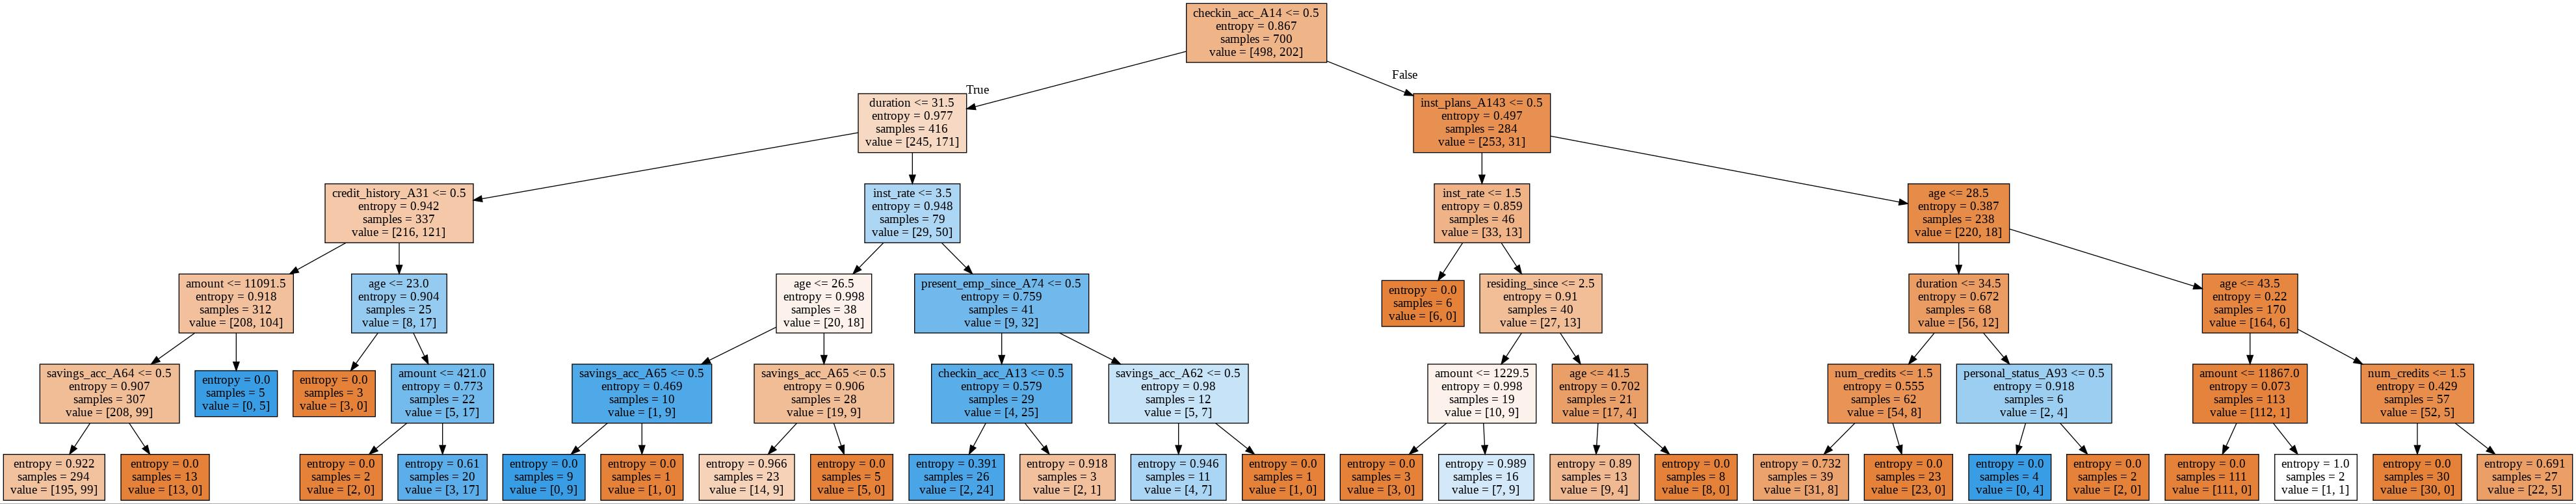

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus as plot
from IPython.display import Image
export_graphviz(clf1 ,out_file = "tree.odt" , feature_names = train_X.columns, filled = True)
graph = plot.graphviz.graph_from_dot_file("tree.odt")

graph.write_jpg("tree.png")
Image(filename = "tree.png")